# Setup workspace, load data, and calculate needed variables

### Import packages and setup options/directories

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
import geopandas as gpd
from glob import glob
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
#from reverse_colormap import reverse_colormap # in python dir
import scipy.stats as stats
from scipy import interpolate as spinterpolate
from shapely.geometry import Polygon
import warnings
import xarray as xr

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# - See what dir we're in
os.getcwd()

'/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v2'

In [5]:
# - Choose set types you want to analyze
# ...settypes options are: afaddfad, afaddfadlog, allsets,
# unassociated, unassociatedother
# ...catchorcpue options are: catch, CPUE 
settypes = 'afaddfadlog'
catchorcpue = 'CPUE'

In [6]:
# - Set data path
dpath = '/opt/skipjack-bigeye-separation/data/'

In [7]:
# - Set saved out figure path
figpath = '/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v2/figures_' + settypes + catchorcpue + '/'

### Define fxns

In [8]:
%run helper_notebooks/bet_skj_sep_fxns.ipynb

### Load WCPFC and ENSO time series data

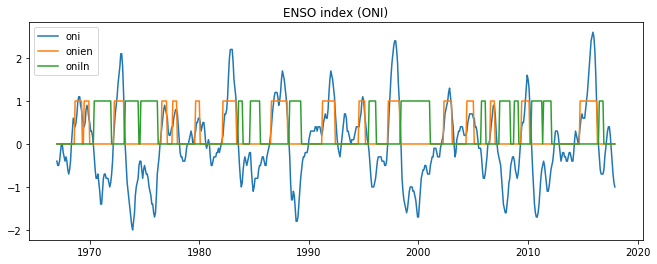

In [9]:
%run helper_notebooks/wcpfc_enso_load_and_calc.ipynb

### Compute temporal correlations btwn BET and BET:SKJ vs. SKJ CPUE

In [10]:
%run helper_notebooks/compute_bet_b2s_vs_skj.ipynb

### Create EEZ map mask

In [11]:
%run helper_notebooks/create_eez_mask_map.ipynb

### Load oceanographic data

In [12]:
%run helper_notebooks/env_vars_load_and_calc.ipynb

### Put all CPUE and env vars into one xr dataset for ease of use by following calculations

In [13]:
dsallvars = bettoskj_cp_tot.to_dataset(name='bettoskj_cp_tot')
dsallvars['skj_cp_tot'] = skj_cp_tot
dsallvars['bet_cp_tot'] = bet_cp_tot
dsallvars['sst'] = sst
dsallvars['temp100'] = temp100
dsallvars['tcd'] = tcd
dsallvars['sss'] = sss
dsallvars['o2100'] = o2100
dsallvars['po2100'] = po2100
dsallvars['thd'] = thd
dsallvars['logchl'] = logchl
dsallvars['mld'] = mld
dsallvars['ssha'] = ssha
dsallvars['oni'] = oni
dfallvars = dsallvars.to_dataframe()
dfallvars.drop(columns=['depth'], inplace=True)
dfallvars.reset_index(inplace=True)

### Compute quotient analyses for SKJ and BET CPUE vs. environmental conditions

In [14]:
%%script false --no-raise-error
%run helper_notebooks/compute_qa_bet_skj_cpue.ipynb

### Compute temporal correlations btwn SKJ, BET, BET:SKJ CPUE vs. environmental conditions

In [15]:
%run helper_notebooks/compute_bet_skj_b2s_vs_env.ipynb